In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import requests
import time
from tqdm import tqdm
import folium
from folium.plugins import MarkerCluster

In [2]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd

In [3]:
from scipy.stats import shapiro   # 정규성 검정
from scipy.stats import ttest_ind, ttest_rel, bartlett    # bartlett : 등분산성 검정
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [307]:
df = pd.read_excel("./data/암.xlsx")

In [308]:
df.head()

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,Type of Drink,Smoke,Height,Weight,FEV1_FVC_P,DLCO_VA_P,EGFR mutation Detection,Operation,Chemotherapy,Radiation Therapy,Death
0,35,1,0,0,1,1,174.2,69.1,82,43,0,0,1,0,0
1,60,1,0,0,3,0,158.8,67.4,52,86,0,0,0,1,0
2,45,1,1,1,1,0,159.7,71.2,49,68,99,1,1,1,1
3,31,0,0,0,99,1,153.6,71.0,82,87,1,1,0,0,0
4,55,0,0,1,99,1,163.6,72.0,68,127,99,0,1,0,0


- AGE : 나이
- Type of Drink : 음주종류
- Smoke : 흡연여부
- Height : 신장값
- Weight : 체중
- FEV1_FVC_P : 폐기능검사(호흡량_ 검사값이 높을수록 좋다)
    - 80% 이상이어야 정상적으로 분류함
- DLCO_VA_P : 일산화탄소확산능 검사 (얘가 50% 이상이 되어야 전처치를 할 수 있음,  
- 전처치 : 본 치료 전 수행하는 치료 
    - 80 ~ 120 이어야 정상 (얘는 키랑 몸무게가 필요함)
- EGFR mutation Detection : 유전자 돌연변이 발견 여부
    - EGFR이란: 상피세포에 성장과 분화에 관여하는 신호와 결합하여 세포 안쪽으로 그 신호를 전달하는 단백질
- Operation : 수술여부
- Chemotherapy : 항암치료 여부
- Radiation Therapy : 방사선치료여부
- Death : 사망여부
- [ 소세포암 ]
- [ 비세포암 ]
    - Adenocarcinoma : 선암
    - Large cell carcinoma : 대세포암 
    - Squamous cell carcinoma : 편평상피세포암

In [309]:
data = df.loc[:,["AGE", "Type of Drink", "Operation","Chemotherapy", "Radiation Therapy","Smoke", "Death"]]
data.head()


,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death
0,35,1,0,1,0,1,0
1,60,3,0,0,1,0,0
2,45,1,1,1,1,0,1
3,31,99,1,0,0,1,0
4,55,99,0,1,0,1,0


In [310]:
df_dummies11 = pd.get_dummies(data['Death'])

df_new = pd.concat([data, df_dummies11], axis=1)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,0,1
0,35,1,0,1,0,1,0,True,False
1,60,3,0,0,1,0,0,True,False
2,45,1,1,1,1,0,1,False,True
3,31,99,1,0,0,1,0,True,False
4,55,99,0,1,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False
4996,44,99,0,0,0,2,0,True,False
4997,80,3,1,1,0,0,0,True,False
4998,69,2,1,1,1,2,0,True,False


- 위의 결과는 Death컬럼의 값을 따로 빼준거임 

In [311]:
df_new.rename(columns = {0 : '생존'}, inplace = True)
df_new.rename(columns = {1 : '사망'}, inplace = True)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망
0,35,1,0,1,0,1,0,True,False
1,60,3,0,0,1,0,0,True,False
2,45,1,1,1,1,0,1,False,True
3,31,99,1,0,0,1,0,True,False
4,55,99,0,1,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False
4996,44,99,0,0,0,2,0,True,False
4997,80,3,1,1,0,0,0,True,False
4998,69,2,1,1,1,2,0,True,False


- Death가 0이면 생존, Death가 1이면 사망한 것 컬럼명 수정해줌

In [312]:
df_dummies5 = pd.get_dummies(data['Type of Drink'])
df_new = pd.concat([df_new, df_dummies5], axis=1)

# df_new

In [313]:
df_new.rename(columns = {1 : '맥주'}, inplace = True)
df_new.rename(columns = {2 : '소주'}, inplace = True)
df_new.rename(columns = {3 : '양주'}, inplace = True)
df_new.rename(columns = {99 : '기타'}, inplace = True)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타
0,35,1,0,1,0,1,0,True,False,True,False,False,False
1,60,3,0,0,1,0,0,True,False,False,False,True,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False
3,31,99,1,0,0,1,0,True,False,False,False,False,True
4,55,99,0,1,0,1,0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True
4996,44,99,0,0,0,2,0,True,False,False,False,False,True
4997,80,3,1,1,0,0,0,True,False,False,False,True,False
4998,69,2,1,1,1,2,0,True,False,False,True,False,False


-  Type of Drink : 음주종류
    - 1 : 맥주
    - 2 : 소주
    - 3 : 양주
    - 99 : 기타

In [314]:
df_dummies = pd.get_dummies(df_new['Smoke'])
#del df_dummies[df_dummies.columns[-2]]
df_new = pd.concat([df_new, df_dummies], axis=1)
#del df_new['Smoke']

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타,0,1,2
0,35,1,0,1,0,1,0,True,False,True,False,False,False,False,True,False
1,60,3,0,0,1,0,0,True,False,False,False,True,False,True,False,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False,True,False,False
3,31,99,1,0,0,1,0,True,False,False,False,False,True,False,True,False
4,55,99,0,1,0,1,0,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True,True,False,False
4996,44,99,0,0,0,2,0,True,False,False,False,False,True,False,False,True
4997,80,3,1,1,0,0,0,True,False,False,False,True,False,True,False,False
4998,69,2,1,1,1,2,0,True,False,False,True,False,False,False,False,True


In [315]:
df_new.rename(columns = {0 : '비흡연'}, inplace = True)
df_new.rename(columns = {1 : '현재흡연'}, inplace = True)
df_new.rename(columns = {2 : '과거흡연'}, inplace = True)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타,비흡연,현재흡연,과거흡연
0,35,1,0,1,0,1,0,True,False,True,False,False,False,False,True,False
1,60,3,0,0,1,0,0,True,False,False,False,True,False,True,False,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False,True,False,False
3,31,99,1,0,0,1,0,True,False,False,False,False,True,False,True,False
4,55,99,0,1,0,1,0,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True,True,False,False
4996,44,99,0,0,0,2,0,True,False,False,False,False,True,False,False,True
4997,80,3,1,1,0,0,0,True,False,False,False,True,False,True,False,False
4998,69,2,1,1,1,2,0,True,False,False,True,False,False,False,False,True


- Smoke 도 동일하게 이름 수정
    - 0 : 비흡연
    - 1 : 현재흡연
    - 2 : 과거흡연 

In [316]:
df_dummies2 = pd.get_dummies(df_new['Operation'])   # 수술여부
df_new = pd.concat([df_new, df_dummies2], axis=1)
df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타,비흡연,현재흡연,과거흡연,0,1
0,35,1,0,1,0,1,0,True,False,True,False,False,False,False,True,False,True,False
1,60,3,0,0,1,0,0,True,False,False,False,True,False,True,False,False,True,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False,True,False,False,False,True
3,31,99,1,0,0,1,0,True,False,False,False,False,True,False,True,False,False,True
4,55,99,0,1,0,1,0,True,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True,True,False,False,False,True
4996,44,99,0,0,0,2,0,True,False,False,False,False,True,False,False,True,True,False
4997,80,3,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False,True
4998,69,2,1,1,1,2,0,True,False,False,True,False,False,False,False,True,False,True


In [317]:
df_new.rename(columns = {0 : '수술X'}, inplace = True)
df_new.rename(columns = {1 : '수술'}, inplace = True)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타,비흡연,현재흡연,과거흡연,수술X,수술
0,35,1,0,1,0,1,0,True,False,True,False,False,False,False,True,False,True,False
1,60,3,0,0,1,0,0,True,False,False,False,True,False,True,False,False,True,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False,True,False,False,False,True
3,31,99,1,0,0,1,0,True,False,False,False,False,True,False,True,False,False,True
4,55,99,0,1,0,1,0,True,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True,True,False,False,False,True
4996,44,99,0,0,0,2,0,True,False,False,False,False,True,False,False,True,True,False
4997,80,3,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False,True
4998,69,2,1,1,1,2,0,True,False,False,True,False,False,False,False,True,False,True


- 수술X 에 True 뜨면 수술 안했단뜻

In [318]:
df_dummies3 = pd.get_dummies(df_new['Chemotherapy'])   # 항암치료
df_new = pd.concat([df_new, df_dummies3], axis=1)
df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타,비흡연,현재흡연,과거흡연,수술X,수술,0,1
0,35,1,0,1,0,1,0,True,False,True,False,False,False,False,True,False,True,False,False,True
1,60,3,0,0,1,0,0,True,False,False,False,True,False,True,False,False,True,False,True,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False,True,False,False,False,True,False,True
3,31,99,1,0,0,1,0,True,False,False,False,False,True,False,True,False,False,True,True,False
4,55,99,0,1,0,1,0,True,False,False,False,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True,True,False,False,False,True,True,False
4996,44,99,0,0,0,2,0,True,False,False,False,False,True,False,False,True,True,False,True,False
4997,80,3,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False,True,False,True
4998,69,2,1,1,1,2,0,True,False,False,True,False,False,False,False,True,False,True,False,True


In [319]:
df_new.rename(columns = {0 : '항암X'}, inplace = True)
df_new.rename(columns = {1 : '항암'}, inplace = True)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,소주,양주,기타,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암
0,35,1,0,1,0,1,0,True,False,True,False,False,False,False,True,False,True,False,False,True
1,60,3,0,0,1,0,0,True,False,False,False,True,False,True,False,False,True,False,True,False
2,45,1,1,1,1,0,1,False,True,True,False,False,False,True,False,False,False,True,False,True
3,31,99,1,0,0,1,0,True,False,False,False,False,True,False,True,False,False,True,True,False
4,55,99,0,1,0,1,0,True,False,False,False,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,False,False,True,True,False,False,False,True,True,False
4996,44,99,0,0,0,2,0,True,False,False,False,False,True,False,False,True,True,False,True,False
4997,80,3,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False,True,False,True
4998,69,2,1,1,1,2,0,True,False,False,True,False,False,False,False,True,False,True,False,True


In [320]:
df_dummies4 = pd.get_dummies(df_new['Radiation Therapy'])   # 방사선치료
df_new = pd.concat([df_new, df_dummies4], axis=1)
df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,...,기타,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,0,1
0,35,1,0,1,0,1,0,True,False,True,...,False,False,True,False,True,False,False,True,True,False
1,60,3,0,0,1,0,0,True,False,False,...,False,True,False,False,True,False,True,False,False,True
2,45,1,1,1,1,0,1,False,True,True,...,False,True,False,False,False,True,False,True,False,True
3,31,99,1,0,0,1,0,True,False,False,...,True,False,True,False,False,True,True,False,True,False
4,55,99,0,1,0,1,0,True,False,False,...,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,...,True,True,False,False,False,True,True,False,True,False
4996,44,99,0,0,0,2,0,True,False,False,...,True,False,False,True,True,False,True,False,True,False
4997,80,3,1,1,0,0,0,True,False,False,...,False,True,False,False,False,True,False,True,True,False
4998,69,2,1,1,1,2,0,True,False,False,...,False,False,False,True,False,True,False,True,False,True


In [321]:
df_new.rename(columns = {0 : '방사선X'}, inplace = True)
df_new.rename(columns = {1 : '방사선'}, inplace = True)

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,...,기타,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,방사선X,방사선
0,35,1,0,1,0,1,0,True,False,True,...,False,False,True,False,True,False,False,True,True,False
1,60,3,0,0,1,0,0,True,False,False,...,False,True,False,False,True,False,True,False,False,True
2,45,1,1,1,1,0,1,False,True,True,...,False,True,False,False,False,True,False,True,False,True
3,31,99,1,0,0,1,0,True,False,False,...,True,False,True,False,False,True,True,False,True,False
4,55,99,0,1,0,1,0,True,False,False,...,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,True,False,False,...,True,True,False,False,False,True,True,False,True,False
4996,44,99,0,0,0,2,0,True,False,False,...,True,False,False,True,True,False,True,False,True,False
4997,80,3,1,1,0,0,0,True,False,False,...,False,True,False,False,False,True,False,True,True,False
4998,69,2,1,1,1,2,0,True,False,False,...,False,False,False,True,False,True,False,True,False,True


In [322]:
df_new.head()

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,...,기타,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,방사선X,방사선
0,35,1,0,1,0,1,0,True,False,True,...,False,False,True,False,True,False,False,True,True,False
1,60,3,0,0,1,0,0,True,False,False,...,False,True,False,False,True,False,True,False,False,True
2,45,1,1,1,1,0,1,False,True,True,...,False,True,False,False,False,True,False,True,False,True
3,31,99,1,0,0,1,0,True,False,False,...,True,False,True,False,False,True,True,False,True,False
4,55,99,0,1,0,1,0,True,False,False,...,True,False,True,False,True,False,False,True,True,False


In [323]:
df_new['맥주']=df_new["맥주"].map({True:0, False:1})
df_new['소주']=df_new["소주"].map({True:0, False:1})
df_new['양주']=df_new["양주"].map({True:0, False:1})
df_new['기타']=df_new["기타"].map({True:0, False:1})
df_new['생존']=df_new["생존"].map({True:0, False:1})
df_new['사망']=df_new["사망"].map({True:0, False:1})
df_new['비흡연']=df_new["비흡연"].map({True:0, False:1})
df_new['현재흡연']=df_new["현재흡연"].map({True:0, False:1})
df_new['과거흡연']=df_new["과거흡연"].map({True:0, False:1})
df_new['수술X']=df_new["수술X"].map({True:0, False:1})
df_new['수술']=df_new["수술"].map({True:0, False:1})
df_new['항암X']=df_new["항암X"].map({True:0, False:1})
df_new['항암']=df_new["항암"].map({True:0, False:1})
df_new['방사선X']=df_new["방사선X"].map({True:0, False:1})
df_new['방사선']=df_new["방사선"].map({True:0, False:1})

df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,...,기타,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,방사선X,방사선
0,35,1,0,1,0,1,0,0,1,0,...,1,1,0,1,0,1,1,0,0,1
1,60,3,0,0,1,0,0,0,1,1,...,1,0,1,1,0,1,0,1,1,0
2,45,1,1,1,1,0,1,1,0,0,...,1,0,1,1,1,0,1,0,1,0
3,31,99,1,0,0,1,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
4,55,99,0,1,0,1,0,0,1,1,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,0,1,1,...,0,0,1,1,1,0,0,1,0,1
4996,44,99,0,0,0,2,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
4997,80,3,1,1,0,0,0,0,1,1,...,1,0,1,1,1,0,1,0,0,1
4998,69,2,1,1,1,2,0,0,1,1,...,1,1,1,0,1,0,1,0,1,0


- 생존, 사망, 비흡연, 현재흡연, 과거흡연, 수술여부, 항임치료여부, 방사선치료 여부를 bool 타입에서 int 타입으로 바꿔줌

In [324]:
# 아래의 결과 모두 int 정수형 타입임을 확인가능
df_new.dtypes

AGE                  int64
Type of Drink        int64
Operation            int64
Chemotherapy         int64
Radiation Therapy    int64
Smoke                int64
Death                int64
생존                   int64
사망                   int64
맥주                   int64
소주                   int64
양주                   int64
기타                   int64
비흡연                  int64
현재흡연                 int64
과거흡연                 int64
수술X                  int64
수술                   int64
항암X                  int64
항암                   int64
방사선X                 int64
방사선                  int64
dtype: object

- 여기까지 전처리

### 비흡연과 사망의 관계분석 

In [325]:
df_new['비흡연'] = df_new['비흡연'].astype(int)
df_new['사망'] = df_new['사망'].astype(int)

result = df_new.groupby(['비흡연', '사망']).size()
result

비흡연  사망
0    0      649
     1     1035
1    0     1262
     1     2054
dtype: int64

In [326]:
correlation = df_new['비흡연'].corr(df_new['사망'])

# 결과 
print("비흡연과 사망 간의 상관계수:", correlation)

비흡연과 사망 간의 상관계수: 0.004681090421859493


- 상관 분석 (Correlation Analysis): '비흡연'과 '사망' 간의 상관 관계를 조사할 수 있습니다. 이를 통해 두 변수 간의 선형 관계의 강도와 방향을 파악할 수 있습니다.



- 비흡연과 사망 간의 선형 상관관계는 매우 약하다고 해석
    - 이 값은 거의 0에 가깝기 때문에 두 변수 간에는 선형 관계가 거의 없음

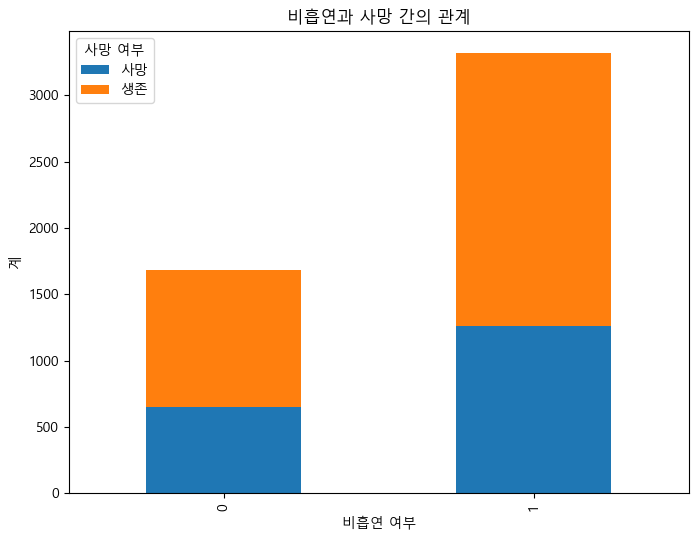

In [327]:
# 비흡연과 사망 간의 빈도 계산
death_count = df_new.groupby('비흡연')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('비흡연과 사망 간의 관계')
plt.xlabel('비흡연 여부')   # True 면 비흡연, False 면 과거흡연 or 현재흡연 
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

- 독립표본 t-검정

In [328]:
from scipy.stats import ttest_ind

# 비흡연 그룹과 흡연 그룹을 나눔
non_smokers = df_new[df_new['비흡연'] == 0]['사망']
smokers = df_new[df_new['비흡연'] == 1]['사망']

# 독립표본 t-검정 수행
t_statistic, p_value = ttest_ind(non_smokers, smokers)


# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -0.33094049673191206
p-value: 0.740703305045777


- 이는 비교 대상인 비흡연 그룹과 흡연 그룹 간의 사망률에 유의한 차이가 없음
    - 통계적으로 유의하다고 판단하려면 p-value 가 0.05보다 작아야함
- 비흡연과 흡연 그룹 간의 사망률에는 유의한 차이가 없음

- 카이제곱 검정

In [232]:
# 비흡연자와 사망 간의 교차표 생성
cross_table = pd.crosstab(df_new['비흡연'], df_new['사망'])

# 교차표 출력
print(cross_table)

# 카이제곱 검정 등 다른 통계적 방법을 사용하여 관계 확인 가능
# 예: chi2 검정
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(cross_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p)

사망     False  True 
비흡연                
False    649   1035
True    1262   2054
Chi-square test statistic: 0.09012798930728441
p-value: 0.7640145067586858


- 비흡연과 사망간의 독립성을 검정
    - 비흡연이 사망 여부에 영향을 미치는지 여부를 확인 가능

- anova 검정

In [233]:
from scipy.stats import f_oneway

# 각 그룹에 해당하는 사망 데이터 추출
non_smokers = df_new[df_new['비흡연'] == 1]['사망']
current_smokers = df_new[df_new['현재흡연'] == 1]['사망']
former_smokers = df_new[df_new['과거흡연'] == 1]['사망']

# 일원배치분산분석 수행
f_statistic, p_value = f_oneway(non_smokers, current_smokers, former_smokers)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.31474575266657373
p-value: 0.7299816781217401


- 범주형 자료형(순서형, 수치적 의미X, 정수형이나 문자열) 은 카이제곱, 연속형 자료형(수치형데이터, 연속적인값) 은 아노바, t-test

#### 비흡연과 생존 관계분석 

In [247]:
df_new['비흡연'] = df_new['비흡연'].astype(int)
df_new['생존'] = df_new['생존'].astype(int)

result = df_new.groupby(['비흡연', '생존']).size()
result

비흡연  생존
0    0     1035
     1      649
1    0     2054
     1     1262
dtype: int64

In [248]:
correlation = df_new['비흡연'].corr(df_new['생존'])

# 결과 
print("비흡연과 생존 간의 상관계수:", correlation)

비흡연과 생존 간의 상관계수: -0.004681090421859493


- 비흡연 여부와 사망률 간의 직접적인 관련성이 매우 약함

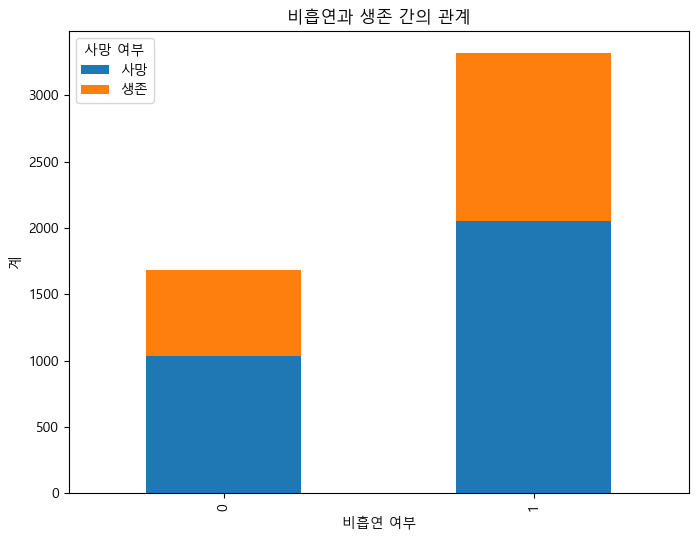

In [249]:
# 비흡연과 사망 간의 빈도 계산
death_count = df_new.groupby('비흡연')['생존'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('비흡연과 생존 간의 관계')
plt.xlabel('비흡연 여부')   # True 면 비흡연, False 면 과거흡연 or 현재흡연 
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

- t - 검정

In [237]:
from scipy.stats import ttest_ind

# 비흡연 그룹과 흡연 그룹을 나눔
non_smokers = df_new[df_new['비흡연'] == 0]['생존']
smokers = df_new[df_new['비흡연'] == 1]['생존']

# 독립표본 t-검정 수행
t_statistic, p_value = ttest_ind(non_smokers, smokers)


# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 0.33094049673190823
p-value: 0.74070330504578


- 위에서 말했듯, 비흡연과 흡연그룹 간 사망률에는 유의한 차이 X

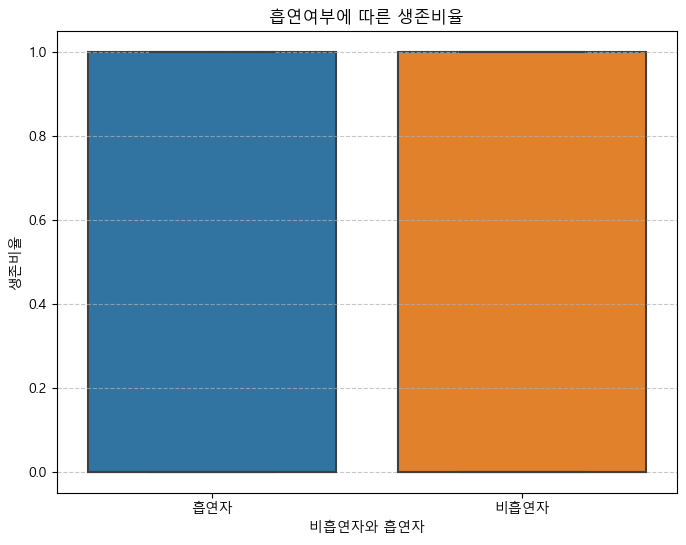

In [251]:
# 비흡연 그룹과 흡연 그룹에 대한 생존률을 박스 플롯으로 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='비흡연', y='생존', data=df_new)
plt.title('흡연여부에 따른 생존비율')
plt.xlabel('비흡연자와 흡연자')
plt.ylabel('생존비율')
plt.xticks([0, 1], ['흡연자', '비흡연자'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- 시각화 한 그래프
    - 근데 이거 너무 ,, 이상함 말이 되나? 싶은데 일단 걍 넣음

#### 현재흡연자와 사망의 관계 

In [252]:
df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,맥주,...,기타,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,방사선X,방사선
0,35,1,0,1,0,1,0,0,1,0,...,1,1,0,1,0,1,1,0,0,1
1,60,3,0,0,1,0,0,0,1,1,...,1,0,1,1,0,1,0,1,1,0
2,45,1,1,1,1,0,1,1,0,0,...,1,0,1,1,1,0,1,0,1,0
3,31,99,1,0,0,1,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
4,55,99,0,1,0,1,0,0,1,1,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,0,1,1,...,0,0,1,1,1,0,0,1,0,1
4996,44,99,0,0,0,2,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
4997,80,3,1,1,0,0,0,0,1,1,...,1,0,1,1,1,0,1,0,0,1
4998,69,2,1,1,1,2,0,0,1,1,...,1,1,1,0,1,0,1,0,1,0


In [253]:
df_new['현재흡연'] = df_new['현재흡연'].astype(bool)
df_new['사망'] = df_new['사망'].astype(bool)

result = df_new.groupby(['현재흡연', '사망']).size()
result

현재흡연   사망   
False  False     399
       True      692
True   False    1512
       True     2397
dtype: int64

In [254]:
correlation = df_new['현재흡연'].corr(df_new['사망'])

# 결과 
print("현재흡연과 사망 간의 상관계수:", correlation)

현재흡연과 사망 간의 상관계수: -0.017917607318480147


- 상관계수는 매우 작으며, 음의 값이므로 현재흡연과 사망 간에는 약한 음의 상관관계가 있음
    - 그러나 상관계수가 너무 작아서 거의 무의미하다고 볼 수 있음
    - 따라서 현재흡연 여부와 사망률 간 직접적인 관련이 X

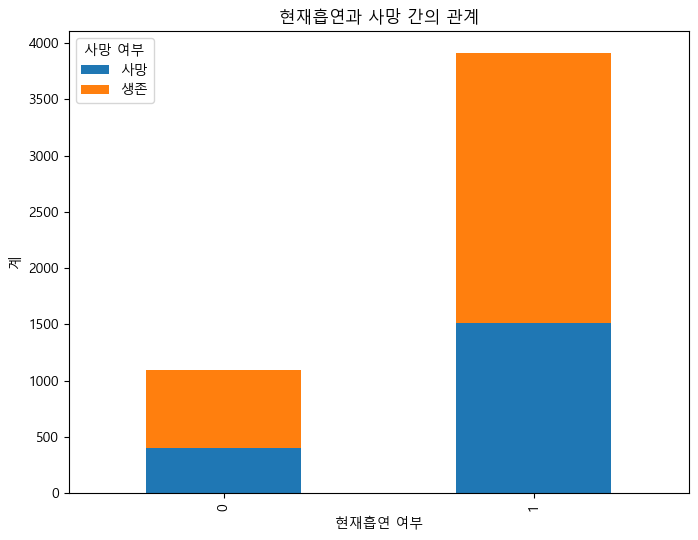

In [329]:
# 현재흡연과 사망 간의 빈도 계산
death_count = df_new.groupby('현재흡연')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('현재흡연과 사망 간의 관계')
plt.xlabel('현재흡연 여부')   # True 면 비흡연, False 면 과거흡연 or 현재흡연 
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

#### 과거흡연과 사망의 관계분석 

In [256]:
df_new['과거흡연'] = df_new['과거흡연'].astype(int)
df_new['사망'] = df_new['사망'].astype(int)

result = df_new.groupby(['과거흡연', '사망']).size()
result

과거흡연  사망
0     0      863
      1     1362
1     0     1048
      1     1727
dtype: int64

In [257]:
correlation = df_new['과거흡연'].corr(df_new['사망'])

# 결과 
print("과거흡연과 사망 간의 상관계수:", correlation)

과거흡연과 사망 간의 상관계수: 0.010439436459979206


- 두 변수 간 선형적인 관계만 고려했기에 정확하진 않음
- 약한 양의 상관관계가 있음, 그러나 상관계수가 매우 작아서 추가적 분석 필요함

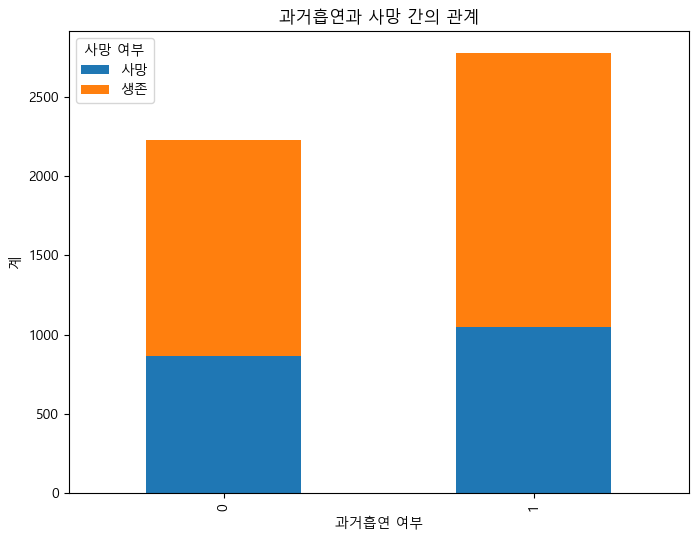

In [258]:
# 과거흡연과 사망 간의 빈도 계산
death_count = df_new.groupby('과거흡연')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('과거흡연과 사망 간의 관계')
plt.xlabel('과거흡연 여부')   # True 면 과거흡연, False 면 비흡연 or 현재흡연 
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

---

## 흡연 여부에 따른 생존자와 사망자 비교

In [276]:
# 흡연 여부(Smoke)에 따른 사망자(Death = 1)와 생존자(Death = 0)의 수 계산
death_counts = df[df['Death'] == 1].groupby('Smoke').size()
alive_counts = df[df['Death'] == 0].groupby('Smoke').size()

In [277]:
# 사망자
death_counts

Smoke
0    649
1    399
2    863
dtype: int64

- 0 : 사망자 중 비흡연자
- 1 : 사망자 중 현재흡연자
- 2 : 사망자 중 과거흡연자

In [278]:
# 생존자
alive_counts

Smoke
0    1035
1     692
2    1362
dtype: int64

- 0 : 생존자 중 비흡연자
- 1 : 생존자 중 현재흡연자
- 2 : 생존자 중 과거흡연자

In [279]:
# 카이제곱 검정용 데이터셋 가공
# 교차테이블 생성
contingency_table = pd.crosstab(df['Smoke'], df['Death'])
contingency_table

Death,0,1
Smoke,,
0,1035,649
1,692,399
2,1362,863


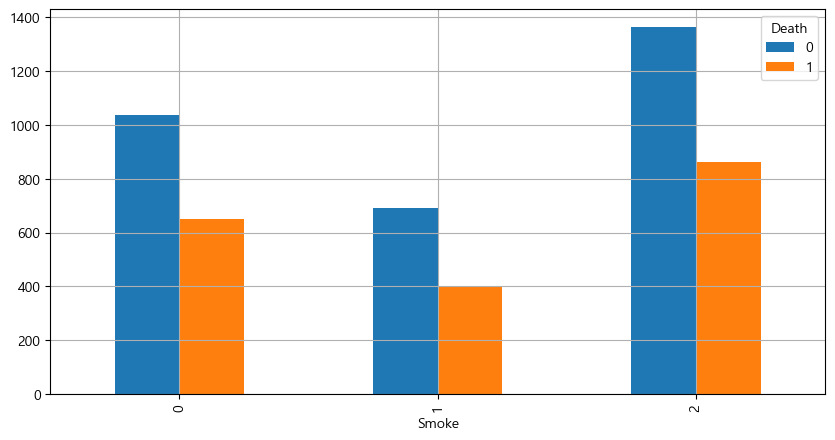

In [280]:
# 흡연과 사망자수 시각화
contingency_table.plot(kind = "bar", figsize = (10, 5))
plt.grid()   # 격자표시
plt.show()

- 0 : 비흡연
    - 0 : 생존
    - 1 : 사망
- 1 : 현재흡연 
    - 0 : 생존
    - 1 : 사망
- 2 : 과거흡연
    - 0 : 생존
    - 1 : 사망

In [281]:
# 카이제곱 검정
chiresult = chi2_contingency(contingency_table, correction = False)
print(f"Chi square: {chiresult[0]}")
print(f"P-value: {chiresult[1]}")

Chi square: 1.6300347035834073
P-value: 0.4426316468425784


- 두 변수간 관련성 X
    - 비흡연과 생존여부 간에는 통계적으로 유의한 관련성 X

### 음주종류에 따른 관계분석

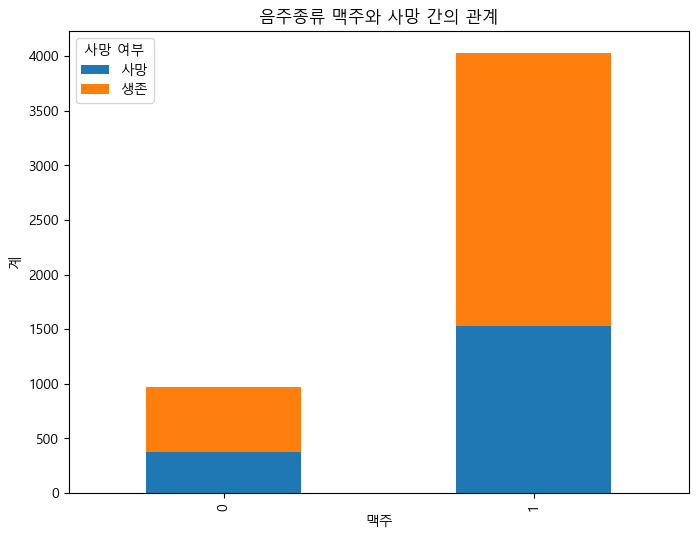

In [282]:
# 맥주와 사망 간의 빈도 계산
death_count = df_new.groupby('맥주')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('음주종류 맥주와 사망 간의 관계')
plt.xlabel('맥주')   
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

In [293]:
correlation = df_new['맥주'].corr(df_new['사망'])

# 결과 
print("음주종류 맥주와 사망 간의 상관계수:", correlation)

음주종류 맥주와 사망 간의 상관계수: 0.008441262562371835


- 맥주 소비량과 사망 간의 선형적인 관계가 거의 없거나 매우 약함
    - 맥주 소비량이 증가하거나 감소함에 따라 사망률이 크게 영향을 받지 않을 가능성이 있습니다.

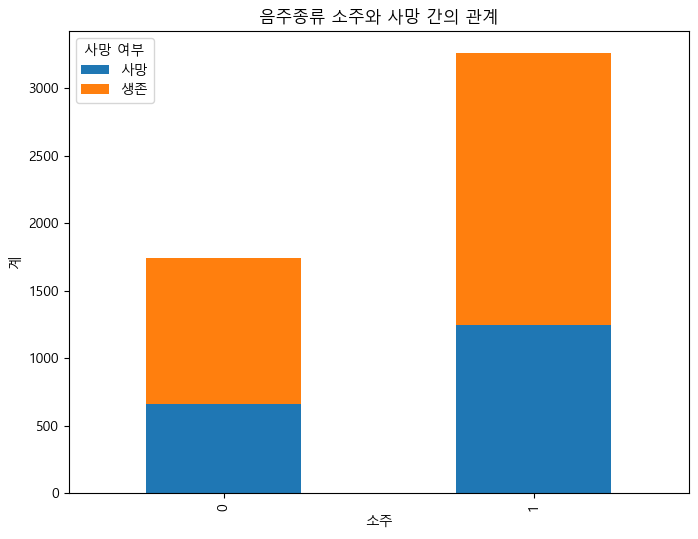

In [292]:
# 소주와 사망 간의 빈도 계산
death_count = df_new.groupby('소주')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('음주종류 소주와 사망 간의 관계')
plt.xlabel('소주')   
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

In [295]:
correlation = df_new['소주'].corr(df_new['사망'])

# 결과 
print("음주종류 소주와 사망 간의 상관계수:", correlation)

음주종류 소주와 사망 간의 상관계수: -0.0020822948402663237


- 상관 계수가 매우 낮으며 0에 가까운 값이므로, 소주 소비량과 사망 간의 선형적인 관계가 거의 없거나 매우 약함

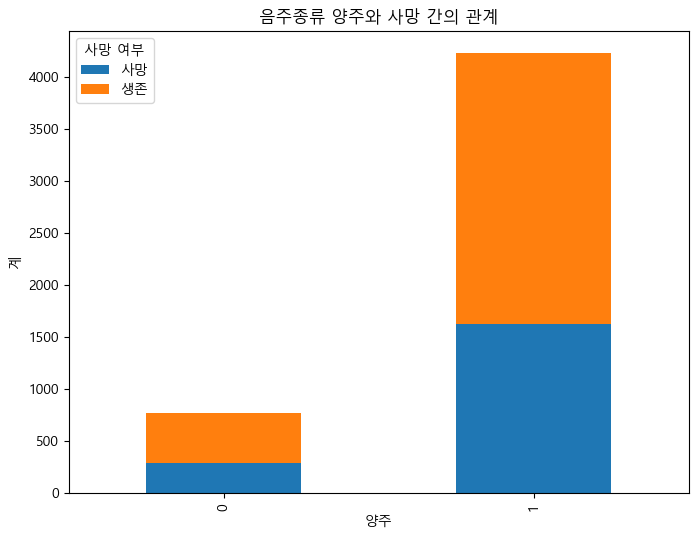

In [296]:
# 양주와 사망 간의 빈도 계산
death_count = df_new.groupby('양주')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('음주종류 양주와 사망 간의 관계')
plt.xlabel('양주')   
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

In [297]:
correlation = df_new['양주'].corr(df_new['사망'])

# 결과 
print("음주종류 양주와 사망 간의 상관계수:", correlation)

음주종류 양주와 사망 간의 상관계수: -0.007176982693181972


- 양주와 사망 간의 선형적인 관계가 거의 없거나 매우 약함

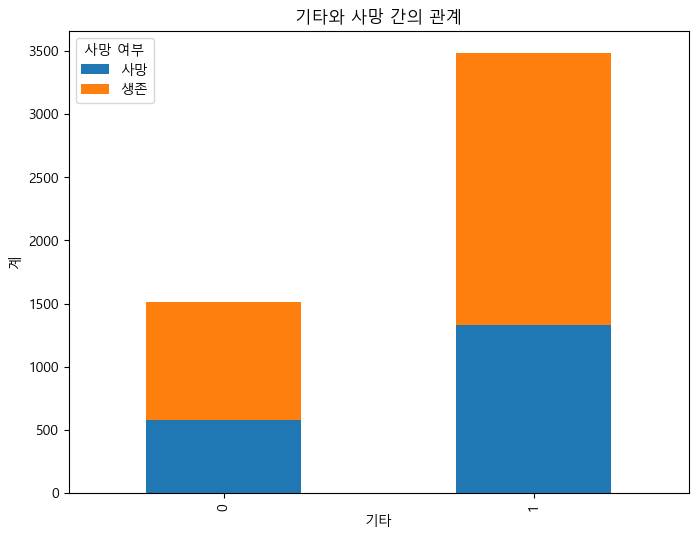

In [298]:
# 기타와 사망 간의 빈도 계산
death_count = df_new.groupby('기타')['사망'].value_counts().unstack()

# 막대 그래프로 표시
death_count.plot(kind='bar', stacked=True, figsize=(8, 6))

# 그래프 제목과 축 라벨 설정
plt.title('기타와 사망 간의 관계')
plt.xlabel('기타')   
plt.ylabel('계')

# 범례 추가
plt.legend(title='사망 여부', labels=['사망', '생존'])

# 그래프 표시
plt.show()

In [299]:
correlation = df_new['기타'].corr(df_new['사망'])

# 결과 
print("기타와 사망 간의 상관계수:", correlation)

기타와 사망 간의 상관계수: 0.000523659994451924


- 기타와 사망은 관계가 거의 X

In [142]:
df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,방사선X,방사선
0,35,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1
1,60,3,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0
2,45,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,0
3,31,99,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,1
4,55,99,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1
4996,44,99,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,1
4997,80,3,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1
4998,69,2,1,1,1,2,0,0,1,1,1,0,1,0,1,0,1,0


In [283]:
# 음주종류(Type of Drink)에 따른 사망자(Death = 1)와 생존자(Death = 0)의 수 계산
death_counts = df[df['Death'] == 1].groupby('Type of Drink').size()
alive_counts = df[df['Death'] == 0].groupby('Type of Drink').size()

In [284]:
death_counts

Type of Drink
1     380
2     663
3     288
99    580
dtype: int64

In [285]:
alive_counts

Type of Drink
1      593
2     1078
3      482
99     936
dtype: int64

- 1 : 맥주
- 2 : 소주
- 3 : 양주
- 99 : 기타

In [286]:
# 카이제곱 검정용 데이터셋 가공
# 교차테이블 생성
contingency_table = pd.crosstab(df['Type of Drink'], df['Death'])
contingency_table

Death,0,1
Type of Drink,,
1,593,380
2,1078,663
3,482,288
99,936,580


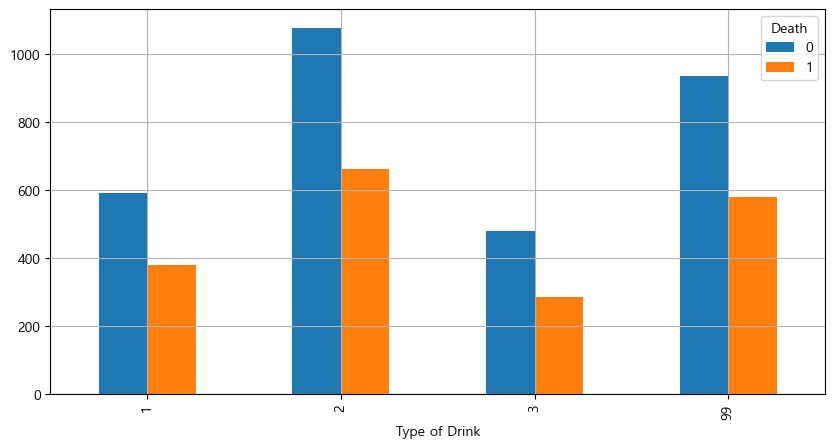

In [287]:
# 음주와 사망자수 시각화
contingency_table.plot(kind = "bar", figsize = (10, 5))
plt.grid()   # 격자표시
plt.show()

- 1 : 맥주
    - 0 : 생존
    - 1 : 사망
- 2 : 소주 
    - 0 : 생존
    - 1 : 사망
- 3 : 양주
    - 0 : 생존
    - 1 : 사망
- 99 : 기타
    - 0 : 생존
    - 1 : 사망

In [288]:
chiresult = chi2_contingency(contingency_table, correction = False)
print(f"Chi square: {chiresult[0]}")
print(f"P-value: {chiresult[1]}")

Chi square: 0.5199131967716835
P-value: 0.9144952885051789


- 음주종류와 생존여부 간 통계적으로 유의한 관련성 X

-- 여기까지 -- 

---

## 다변량 회귀분석 (얜 아직 안배우긴함)

- 구글링해서 한거라 정답인지 아닌지 모름 걍 넣음

In [233]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 선택
X = df_new[['과거흡연', '비흡연', '현재흡연']]  # 독립 변수들
y = df_new['사망']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 다변량 회귀 모델 생성
model = sm.OLS(y, X.astype(float))

# 모델 피팅
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     사망   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8148
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.443
Time:                        19:41:59   Log-Likelihood:                -3485.4
No. Observations:                5000   AIC:                             6977.
Df Residuals:                    4997   BIC:                             6996.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2659      0.003     86.499      0.0

- 회귀 계수(coef), 해당 계수들의 표준 오차(std err),  t 통계량, p-value

- const(상수향)
    - const의 계수(coef)는 0.2659이며, 이는 모든 독립 변수가 0일 때 종속 변수의 예측값
- 과거흡연
    - 과거흡연과 사망률 간의 관계
    - 과거흡연의 계수(coef)는 0.1854
    - p-value가 매우 작으므로 통계적으로 매우 유의미
- 비흡연 
    - 비흡연의 계수(coef)는 0.1830이며, 과거흡연과 비슷함
- 현재흡연
    - 현재흡연의 계수(coef)는 0.1633
    
- 따라서 각 독립변수(과거, 현재, 비흡연)이 종속변수(사망률)에 유의미한 영향
    - 과거흡연이 가장 큰 영향미침

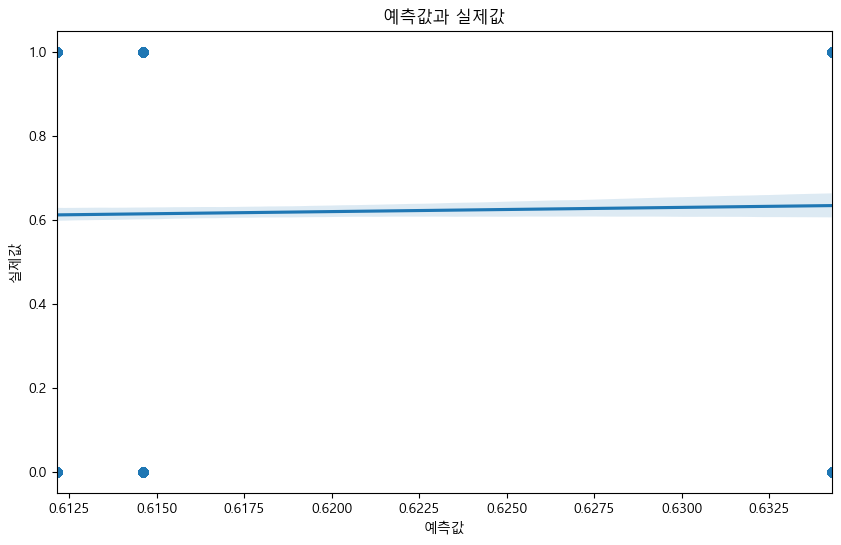

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# 모델의 예측값과 실제값 추출
predicted_values = results.fittedvalues
actual_values = y

# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x=predicted_values, y=y, scatter_kws={'alpha':0.5})
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('예측값과 실제값')
plt.show()

---

### 수술여부와 사망의 관계

In [116]:
from scipy.stats import chi2_contingency

# 분할표 생성
contingency_table = pd.crosstab(df_new['수술'], df_new['사망'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 통계량:", chi2)
print("p-value:", p)


카이제곱 검정 통계량: 0.0
p-value: 1.0


- 수술여부와 생존여부는 관련성 X

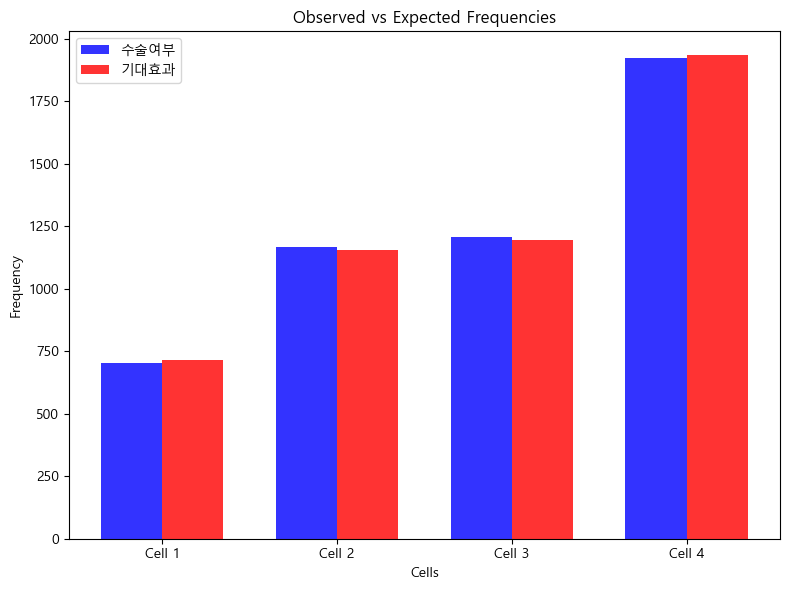

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# 카이제곱 검정 결과에서 기대값 추출
expected_values = expected.ravel()

# 카이제곱 검정 결과 시각화
plt.figure(figsize=(8, 6))
index = np.arange(len(expected_values))
bar_width = 0.35
opacity = 0.8

plt.bar(index, contingency_table.values.ravel(), bar_width,
        alpha=opacity, color='b', label= "수술여부")

plt.bar(index + bar_width, expected_values, bar_width,
        alpha=opacity, color='r', label='기대효과')

plt.xlabel('Cells')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.xticks(index + bar_width / 2, ('Cell 1', 'Cell 2', 'Cell 3', 'Cell 4'))
plt.legend()

plt.tight_layout()
plt.show()


- 오차막대 그래프

In [123]:
from scipy.stats import chi2_contingency

# 분할표 생성
contingency_table = pd.crosstab(df_new['항암'], df_new['사망'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 통계량:", chi2)
print("p-value:", p)


카이제곱 검정 통계량: 0.38296050358688105
p-value: 0.5360230681843647


- 항암여부와 생존여부는 관련성 X

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 카이제곱 검정 결과에서 기대값 추출
expected_values = expected.ravel()

# 카이제곱 검정 결과 시각화
plt.figure(figsize=(8, 6))
index = np.arange(len(expected_values))
bar_width = 0.35
opacity = 0.8

plt.bar(index, contingency_table.values.ravel(), bar_width,
        alpha=opacity, color='b', label='Observed')

plt.bar(index + bar_width, expected_values, bar_width,
        alpha=opacity, color='r', label='Expected')

plt.xlabel('Cells')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.xticks(index + bar_width / 2, ('Cell 1', 'Cell 2', 'Cell 3', 'Cell 4'))
plt.legend()

plt.tight_layout()
plt.show()



In [124]:
from scipy.stats import chi2_contingency

# 분할표 생성
contingency_table = pd.crosstab(df_new['방사선'], df_new['사망'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 통계량:", chi2)
print("p-value:", p)


카이제곱 검정 통계량: 0.45495304603211983
p-value: 0.4999921684473755


- 방사선치료 여부와 생존여부는 관련 X
    - 귀무가설 : 방사선과 사망은 관계가 없다

- 수술, 항암, 방사선은 유의미한 관계를 파악하기 위해 분석을 더 진행을 했어야 했는데 시간 상 불가하였다

In [119]:
df_new

,AGE,Type of Drink,Operation,Chemotherapy,Radiation Therapy,Smoke,Death,생존,사망,비흡연,현재흡연,과거흡연,수술X,수술,항암X,항암,방사선X,방사선
0,35,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1
1,60,3,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0
2,45,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,0
3,31,99,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,1
4,55,99,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,47,99,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1
4996,44,99,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,1
4997,80,3,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1
4998,69,2,1,1,1,2,0,0,1,1,1,0,1,0,1,0,1,0


In [125]:
df_new[["사망", "비흡연"]].corr()

,사망,비흡연
사망,1.000000,0.004681
비흡연,0.004681,1.000000


In [134]:
death = df_new["사망"].value_counts()
death 

사망
1    3089
0    1911
Name: count, dtype: int64

In [129]:
continents = df["Smoke"].value_counts()
continents

Smoke
2    2225
0    1684
1    1091
Name: count, dtype: int64

- 끊은사람 : 2225명
- 안핀사람 : 1684명
- 피는사람 : 1091명

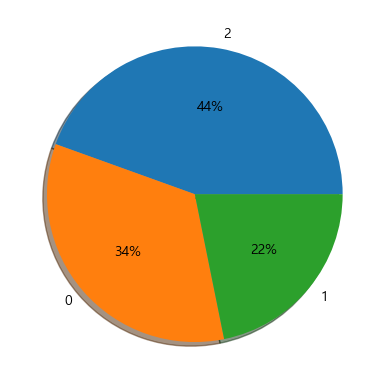

In [130]:
plt.pie(continents.values, labels = continents.index, autopct = "%.0f%%", shadow = True)
plt.show()

- 끊은사람(2) : 44%
- 안핀사람(0) : 34%
- 피는사람(1) : 22%

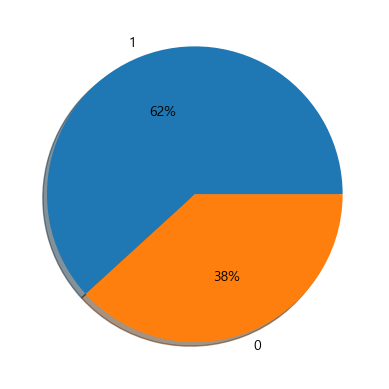

In [135]:
plt.pie(death.values, labels = death.index, autopct = "%.0f%%", shadow = True)
plt.show()

- 산사람(0) : 62%
- 죽은사람(1) : 38%